In [8]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"

In [79]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset

In [63]:
Data = Dataset(PROJECT_PATH, 'round3')
Data.load_data()

Loading INFO.yaml ...
Finished loading INFO
Loading config.yaml ...
Finished loading config


In [71]:
# configuration
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

<hr>
<hr>

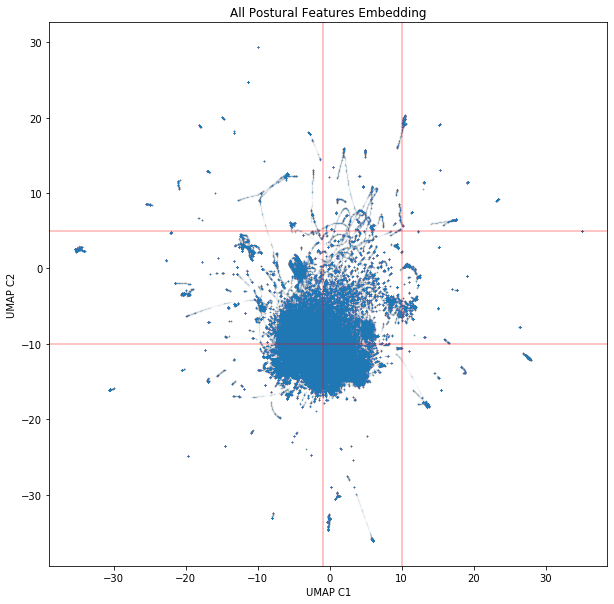

In [78]:
x_lim = (-1,10)
y_lim = (-10,5)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(all_embed[:,0], all_embed[:,1], s=1, alpha=0.01)

for x, y in zip(x_lim, y_lim):
    ax.axvline(x=x, c='r', alpha=0.3)
    ax.axhline(y=y, c='r', alpha=0.3)

ax.set(xlabel='UMAP C1', ylabel='UMAP C2', title="All Postural Features Embedding")
plt.show()

In [90]:
x_cond = (all_embed[:,0]<x_lim[0]) | (all_embed[:,0]>x_lim[1])
y_cond = (all_embed[:,1]<y_lim[0]) | (all_embed[:,1]>y_lim[1])
bad_fr = np.where(x_cond | y_cond)[0]

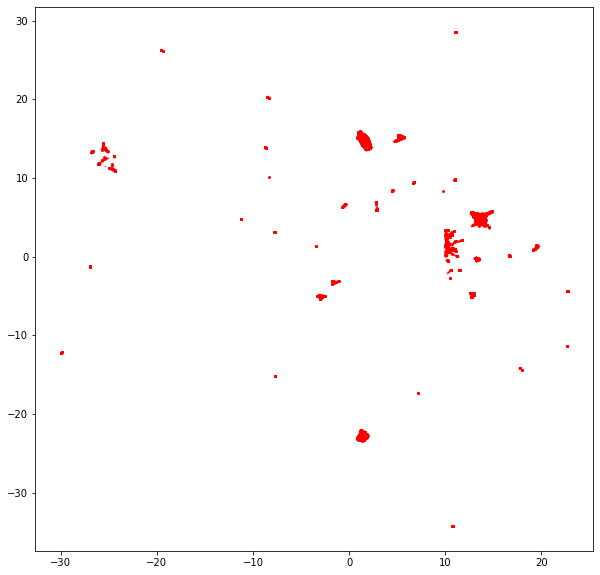

In [92]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(all_embed[bad_fr,0], all_embed[bad_fr,1], s=1, alpha=0.5, c='r')
plt.show()

[10.31447983  1.60800385]


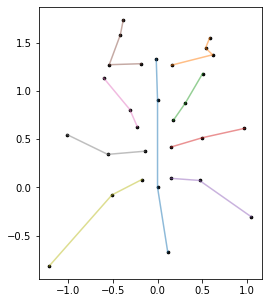

In [139]:
fr = random.choice(bad_fr)
print(all_embed[fr])

fig, ax = plt.subplots(figsize=(4,5))
ax.scatter(bp[fr,:,0], bp[fr,:,1], s=7, c='k')
for skeleton_i, color_i in zip(skeleton, skeleton_color):
    ax.plot(bp[fr,skeleton_i,0], bp[fr,skeleton_i,1], alpha=0.5, c=color_i)
plt.show()

In [129]:
bp[:,:,0:2].shape

(1000781, 30, 2)